In [13]:
import scipy.io
import numpy as np
import pylab as pl
from src.read_data import lire_alpha_digits
from src.principal_DNN import DnnModel

In [14]:
mat = scipy.io.loadmat('data/binaryalphadigs.mat')
data_digits = mat['dat'][:10,]
data_alpha = mat['dat'][10:,]
print("data_digits shape = {}".format(data_digits.shape))
print("data_alpha shape = {}".format(data_alpha.shape))

data_digits shape = (10, 39)
data_alpha shape = (26, 39)


In [15]:
Xa = lire_alpha_digits(data_alpha, [0])
Xb = lire_alpha_digits(data_alpha, [1])
Xc = lire_alpha_digits(data_alpha, [2])
# data_digits_reshaped = lire_alpha_digits(data_digits, [0])

In [16]:
Xab = np.concatenate((Xa, Xb))
Xac = np.concatenate((Xa, Xc))
Xabc = np.concatenate((Xa, Xc, Xb))

In [17]:
dnn = DnnModel(d=3, p=320, q=150, n_classes=3)
dnn.pretrain_DNN(X=Xa, niter=250, step=0.01, batch=10)
dnn.pretrain_DNN(X=Xac, niter=250, step=0.01, batch=10)
dnn.pretrain_DNN(X=Xabc, niter=250, step=0.01, batch=10)

Training Layer 1/3 ...


Reconstruction error (MSE) for layer 1 = 5.0
Training Layer 2/3 ...
Reconstruction error (MSE) for layer 2 = 1.2307692307692308
Training Layer 3/3 ...
Reconstruction error (MSE) for layer 3 = 1.9230769230769231
Training Layer 1/3 ...
Reconstruction error (MSE) for layer 1 = 4.3076923076923075
Training Layer 2/3 ...
Reconstruction error (MSE) for layer 2 = 1.141025641025641
Training Layer 3/3 ...
Reconstruction error (MSE) for layer 3 = 1.1538461538461537
Training Layer 1/3 ...
Reconstruction error (MSE) for layer 1 = 4.965811965811966
Training Layer 2/3 ...
Reconstruction error (MSE) for layer 2 = 0.8888888888888888
Training Layer 3/3 ...
Reconstruction error (MSE) for layer 3 = 1.5897435897435896


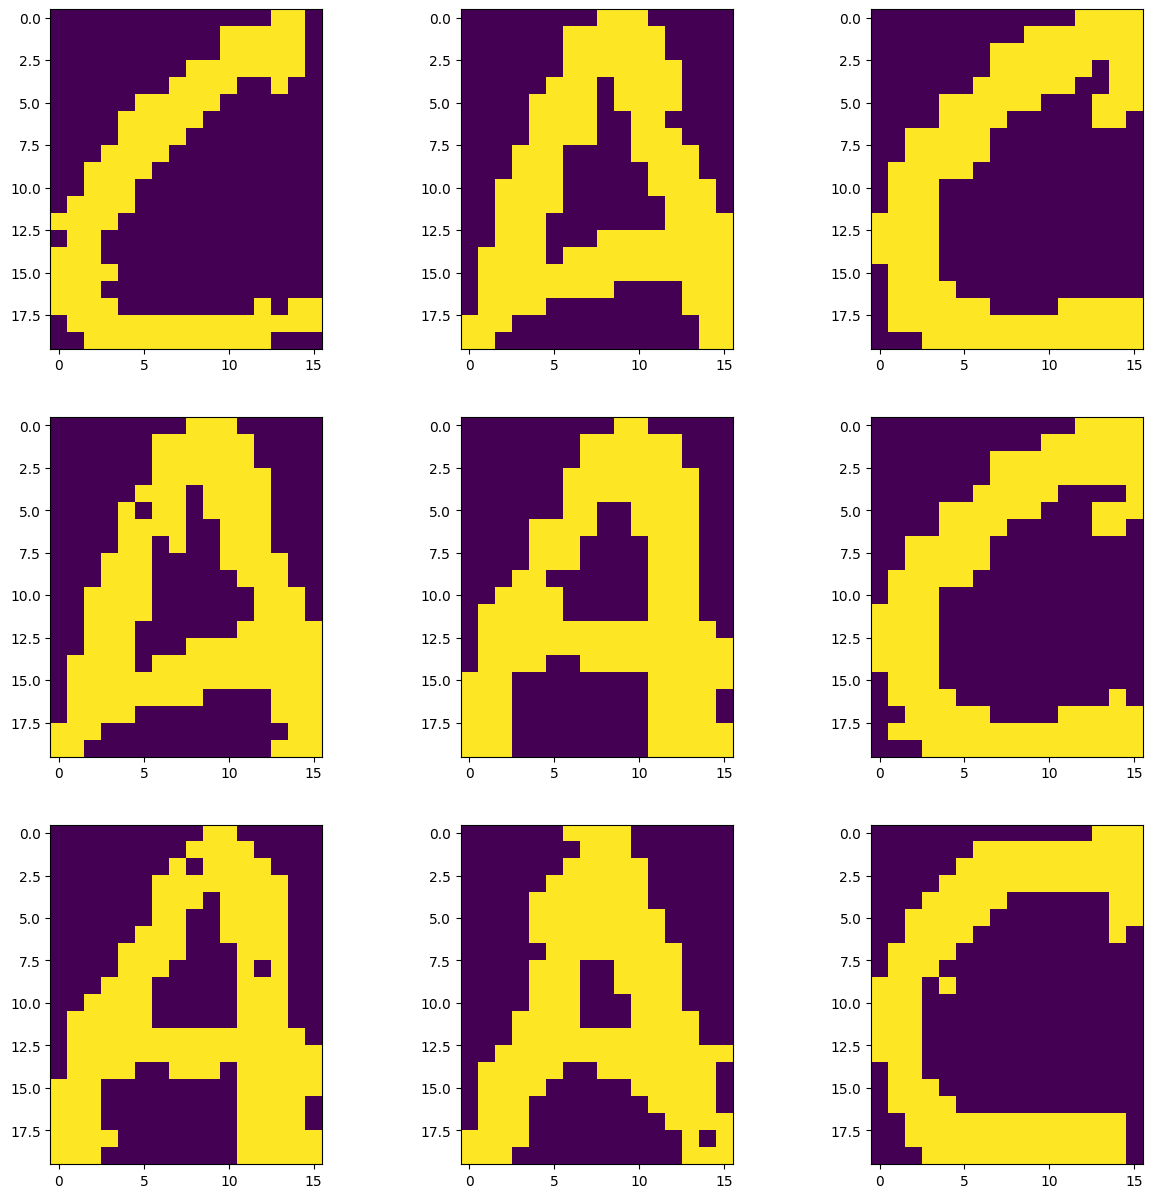

In [18]:
gen = dnn.generer_image_DBN(9, 10)

fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20, 16))

In [19]:
Xabc = np.concatenate((Xa, Xb, Xc))

In [20]:
y = np.concatenate((np.zeros(39), np.ones(39), 2*np.ones(39))).astype(int)

In [21]:
dnn.train_DNN(Xabc, y, Xabc, y, n_epochs=50, epsilon=0.01, batch=10, training_track=True, verbose=True)

Epoch 0/50 : Accuracy score train = 0.6923076923076923 | Accuracy score test = 0.6923076923076923
Epoch 1/50 : Accuracy score train = 0.7008547008547008 | Accuracy score test = 0.7008547008547008
Epoch 2/50 : Accuracy score train = 0.6837606837606838 | Accuracy score test = 0.6837606837606838
Epoch 3/50 : Accuracy score train = 0.6752136752136753 | Accuracy score test = 0.6752136752136753
Epoch 4/50 : Accuracy score train = 0.6752136752136753 | Accuracy score test = 0.6752136752136753
Epoch 5/50 : Accuracy score train = 0.6837606837606838 | Accuracy score test = 0.6837606837606838
Epoch 6/50 : Accuracy score train = 0.6837606837606838 | Accuracy score test = 0.6837606837606838
Epoch 7/50 : Accuracy score train = 0.6837606837606838 | Accuracy score test = 0.6837606837606838
Epoch 8/50 : Accuracy score train = 0.6837606837606838 | Accuracy score test = 0.6837606837606838
Epoch 9/50 : Accuracy score train = 0.6837606837606838 | Accuracy score test = 0.6837606837606838
Epoch 10/50 : Accura

In [22]:
y_hat = dnn.predict(Xabc)

In [23]:
np.mean(y==y_hat)

0.9572649572649573

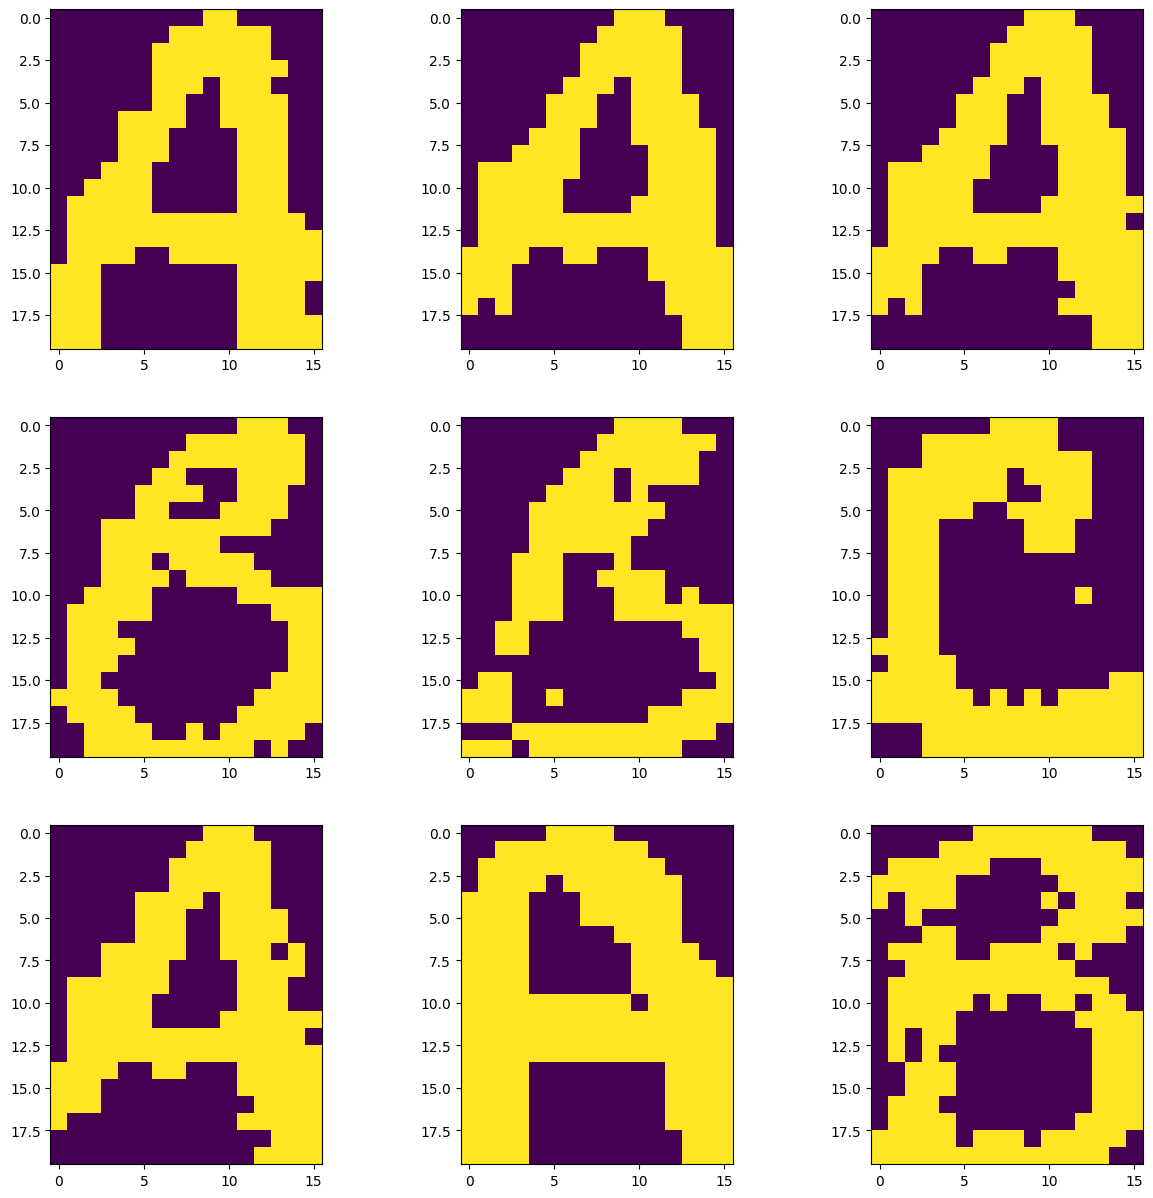

In [24]:
gen = dnn.generer_image_DBN(9, 10)

fig, ax = pl.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(gen[3*i + j,:].reshape(20, 16))

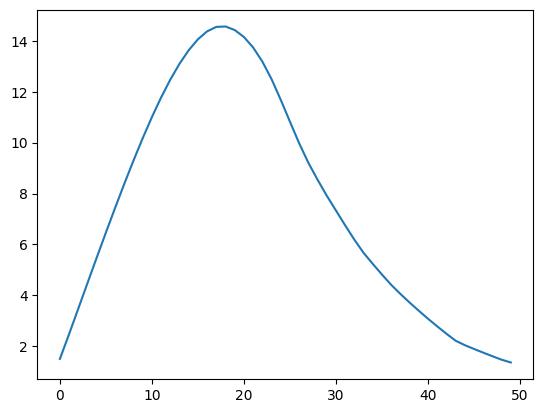

In [25]:
pl.plot(dnn.losses_train)